## Reto 1: Pruebas A/B

### 1. Objetivos:
    - Practicar evaluar los resultados de una Prueba A/B
 
---
    
### 2. Desarrollo:

### a) Evaluando una prueba A/B de flujo de ventas

El archivo 'ab_test-sales_pipeline-2' tiene datos muy similares a los que vimos en el último ejemplo. Estamos evaluando dos flujos de ventas distintos: A y B. Cada vez que alguien compró el producto gracias a uno de los dos flujos, se registró como un `1` en la columna `conversion` y un `0` en la columna `no conversion`.

Evalúa la prueba A/B para saber si los resultados obtenidos son estadísticamente significativos. El Reto consiste en los siguientes pasos:

1. Primero cuantifica cuál de los flujos de ventas fue más efectivo y en qué proporción.
2. Después aplica el test de permutación:
    1. Combina los resultados de ambos grupos en un mismo conjunto de datos
    2. Revuelve los datos
    3. Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
    4. El resto de los datos conforman nuestro nuevo grupo B.
    5. Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
    6. Repite los pasos 1-5 `R` veces para obtener una distribución de la estadística de interés.
3. Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.
4. Cuantifica el Valor P y evalúa la significación estadística con un Alfa de 0.05 (5%).
5. Comenta tus hallazgos con tus compañeros y la experta.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto ab_test-sales_pipeline-2.csv')
df

,test,conversion,no conversion
0,A,0,1
1,B,0,1
2,A,0,1
3,A,0,1
4,B,0,1
...,...,...,...
76322,B,0,1
76323,A,0,1
76324,B,0,1
76325,B,1,0


In [24]:
total_count = df.groupby('test')[['conversion', 'no conversion']].sum()
total_count

,conversion,no conversion
test,,
A,4163,30576
B,4841,36747


In [25]:
total_count['sucess_rate'] = total_count['conversion'] / (total_count['conversion'] + total_count['no conversion'])
total_count

,conversion,no conversion,sucess_rate
test,,,
A,4163,30576,0.119836
B,4841,36747,0.116404


In [26]:
diferencia_en_proporcion = 1 - (total_count.loc['B']['sucess_rate'] / total_count.loc['A']['sucess_rate'])
f'El Test A fue {diferencia_en_proporcion * 100:.4f} % mejor que B para generar ventas'

'El Test A fue 2.8645 % mejor que B para generar ventas'

In [27]:
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

value_counts = df['test'].value_counts()

for i in range(1000):
  a = df.sample(value_counts.loc['A'], replace=False)
  conv_a.append(a['conversion'].sum())
  no_conv_a.append(a['no conversion'].sum())

  b = df.loc[~df.index.isin(a.index)]
  conv_b.append(b['conversion'].sum())
  no_conv_b.append(b['no conversion'].sum())

In [28]:
results = pd.DataFrame({
    'conv_a':conv_a,
    'conv_b':conv_b,
    'no_conv_a':no_conv_a,
    'no_conv_b':no_conv_b
})
results

,conv_a,conv_b,no_conv_a,no_conv_b
0,4086,4918,30653,36670
1,4113,4891,30626,36697
2,4089,4915,30650,36673
3,4088,4916,30651,36672
4,4127,4877,30612,36711
...,...,...,...,...
995,4179,4825,30560,36763
996,4187,4817,30552,36771
997,4194,4810,30545,36778
998,4062,4942,30677,36646


In [30]:
results['a_conv_rate'] = results['conv_a'] /(results['conv_a']+results['no_conv_a'])
results['b_conv_rate'] = results['conv_b'] /(results['conv_b']+results['no_conv_b'])
results['diff'] = 1 - (results['b_conv_rate'] / results['a_conv_rate'])
results

,conv_a,conv_b,no_conv_a,no_conv_b,a_conv_rate,b_conv_rate,diff
0,4086,4918,30653,36670,0.117620,0.118255,-0.005401
1,4113,4891,30626,36697,0.118397,0.117606,0.006682
2,4089,4915,30650,36673,0.117706,0.118183,-0.004051
3,4088,4916,30651,36672,0.117678,0.118207,-0.004501
4,4127,4877,30612,36711,0.118800,0.117269,0.012885
...,...,...,...,...,...,...,...
995,4179,4825,30560,36763,0.120297,0.116019,0.035562
996,4187,4817,30552,36771,0.120527,0.115827,0.039001
997,4194,4810,30545,36778,0.120729,0.115658,0.041999
998,4062,4942,30677,36646,0.116929,0.118832,-0.016277


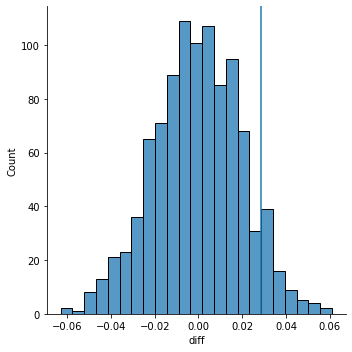

In [31]:
sns.displot(results['diff'])
plt.axvline(diferencia_en_proporcion)

In [32]:
(results['diff'] >= diferencia_en_proporcion).sum()/results.shape[0]*100

7.5